This exercise will require you to pull some data from https://data.nasdaq.com/ (formerly Quandl API).

As a first step, you will need to register a free account on the https://data.nasdaq.com/ website.

After you register, you will be provided with a unique API key, that you should store:

*Note*: Use a `.env` file and put your key in there and `python-dotenv` to access it in this notebook. 

The code below uses a key that was used when generating this project but has since been deleted. Never submit your keys to source control. There is a `.env-example` file in this repository to illusrtate what you need. Copy that to a file called `.env` and use your own api key in that `.env` file. Make sure you also have a `.gitignore` file with a line for `.env` added to it. 

The standard Python gitignore is [here](https://github.com/github/gitignore/blob/master/Python.gitignore) you can just copy that. 

In [1]:
# get api key from your .env file
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv('NASDAQ_API_KEY')

import matplotlib.pyplot as plt

Nasdaq Data has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Nasdaq Data API instructions here: https://docs.data.nasdaq.com/docs/in-depth-usage

While there is a dedicated Python package for connecting to the Nasdaq API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
import requests
import json

Note: API's can change a bit with each version, for this exercise it is reccomended to use the nasdaq api at `https://data.nasdaq.com/api/v3/`. This is the same api as what used to be quandl so `https://www.quandl.com/api/v3/` should work too.

Hint: We are looking for the `AFX_X` data on the `datasets/FSE/` dataset.

### 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

In [3]:
# Create dict of params to pass to requests.get along with the website

In [4]:
params = {'api_key': API_KEY, 'start_date':'2017-01-01', 'end_date':'2017-12-31'}

In [5]:
website = 'https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X'
r = requests.get("{}/data.json".format(website), params=params)

In [6]:
#Load the data with the built-in json module

### 2. Convert the returned JSON object into a Python dictionary.


In [7]:
data = json.loads(r.text)

In [8]:
days_ordered = data['dataset_data']['data'][::-1]
columns = data['dataset_data']['column_names']

In [10]:
#build and fill a list of lists
list_of_lists = [[] for i in range(len(columns))]

for row in days_ordered:
    for i, col in enumerate(row):
        list_of_lists[i].append(col)

In [11]:
data_dict = {k:v for k,v in zip(columns, list_of_lists)}

In [12]:
data_dict.keys()

dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'])

### 3. Calculate what the highest and lowest opening prices were for the stock in this period.


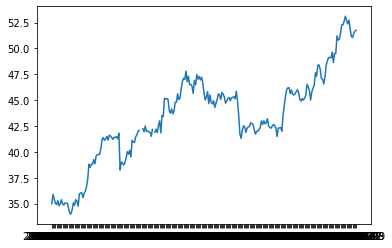


The highest opening price was 53.11 and the lowest opening price was 34.0



In [13]:
def highest(a_list):
    high = 0
    for price in a_list:
        if price != None and price > high:
            high = price
    return high

def lowest(a_list):
    low = 1000
    for price in a_list:
        if price != None and price < low:
            low = price
    return low

daily_high = highest(data_dict['Open'])

daily_low = lowest(data_dict['Open'])

plt.plot(data_dict['Date'],data_dict['Open'])
plt.show()

print("\nThe highest opening price was {} and the lowest opening price was {}\n".format(daily_high, daily_low))

### 4. What was the largest change in any one day (based on High and Low price)?


In [14]:
#use list comprehension to get list of differences for each day, then get the max difference

biggest_daily_change = max([h-l for h,l in zip(data_dict['High'], data_dict['Low'])])

print("\nThe biggest change in a single day was {}\n".format(biggest_daily_change))


The biggest change in a single day was 2.8100000000000023



### 5. What was the largest change between any two days (based on Closing Price)?

In [15]:
# iterate through the list of days, checking if the difference is larger than previous largest value
close = data_dict['Close']
max_diff = 0
for i, today in enumerate(close):
    today_diff = abs(today - close[i+1])
    
    if today_diff > max_diff:
        max_diff = today_diff
#if we get to the end of the list, break        
    if (i+2) == len(close):
        break


#Try another way with list comprehension to check
max_diff2 = max([abs(a-b) for a,b in zip(close[:-1],close[1:])])

assert max_diff == max_diff2

print("\nThe biggest difference between any two days closing prices was {}.\n".format(max_diff))


The biggest difference between any two days closing prices was 2.559999999999995.



### 6. What was the average daily trading volume during this year?


The daily average trading volume was 89124.33725490196



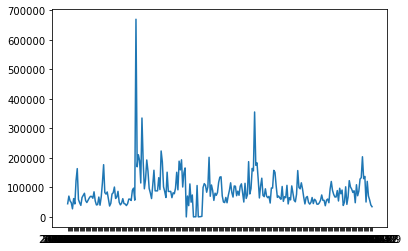

In [16]:
#Take the sum divided by the len of trading volume list to get the daily avg

daily_avg_vol = sum(data_dict['Traded Volume'])/len(data_dict['Traded Volume'])

print("\nThe daily average trading volume was {}\n".format(daily_avg_vol))

#plot a graph to make sure values make sense

plt.plot(data_dict['Date'], data_dict['Traded Volume'])
plt.show()

### 7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [17]:
#sort the list of trading volumes
volum_count = sorted(data_dict['Traded Volume'])

In [18]:
#get the trading volume median two different ways

volume_med = volum_count[len(volum_count)//2]

while len(volum_count) > 1:
    volum_count.pop()
    volum_count.pop(0)

assert volume_med == volum_count[0]

#Looks good based on graph above
print("\nThe median trading volume during the year was {}.\n".format(volum_count[0]))


The median trading volume during the year was 76286.0.

